# 6.6 Sourcing & Analyzing Time Series Data

## Table of Contents

1. Notebook Prep
    Import libraries
    Display graphs inline
    Define 'path' variable
    Import dataframe
    
2. Subset the Data
    Create subset
    Explanation
    Reset index
    Set datetime object as index
    Check for Duplicates
    Check for Missing Values

3. Create a Line Chart

4. Decompose the Data
    Decompose
    Define chart size
    Plot decomposition
    Analysis of Results

5. Conduct Dickey-Fuller Test for Stationarity
    Define dickey_fuller
    Apply dickey_fuller
    Interpretation

6. Differencing
    Perform Differencing
    Plot New Data
    Redo dickey_fuller
    Interpretation

7. Check Autocorrelations

### 1. Notebook Prep

In [15]:
# Import libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 
from datetime import datetime
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [16]:
# Display graphs inline

%matplotlib inline

In [17]:
# Define 'path' variable

path = r'D:\Achievement 6'

In [34]:
# Import dataframe

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'finances_reformatted.csv'))

### 2. Subset the Data

In [36]:
# Create Subset

df_agg = df.groupby(['ref_year'])['total_expenditure'].sum()

EXPLANATION

I utilized data from an earlier step, before merging data sets, because the data set I am mainly using only has 6 years as data points. Quandl is no longer Quandl (and hasn't been for the last 5 years), so I don't know if that's why I couldn't find any relevant data on the NASDAQ website. This data, however, *is* still a part of my existing data in the background, so perhaps understanding the the shape of funding in general over the years may still prove important to keep track of.

In [37]:
df_agg.head()

ref_year
1992    237333143
1993    244202408
1994    252664869
1995    281831835
1996    297740499
Name: total_expenditure, dtype: int64

In [38]:
# Reset index

df2 = df_agg.reset_index()

df2

,ref_year,total_expenditure
0,1992,237333143
1,1993,244202408
2,1994,252664869
3,1995,281831835
4,1996,297740499
5,1997,315861220
6,1998,336384794
7,1999,360474429
8,2000,386177409
9,2001,417014891


In [39]:
df2.dtypes 

ref_year             int64
total_expenditure    int64
dtype: object

In [40]:
# Set datetime object as index

df2['datetime'] = pd.to_datetime(df2['ref_year'], format = '%Y')
df2 = df2.set_index('datetime')
df2.drop(['ref_year'], axis = 1, inplace = True)
df2.head()

,total_expenditure
datetime,
1992-01-01,237333143
1993-01-01,244202408
1994-01-01,252664869
1995-01-01,281831835
1996-01-01,297740499


In [47]:
# Check for Duplicates

df_dup = df2.duplicated()

df_dup.shape

(25,)

In [48]:
# Check for missing values

df2.isnull().sum()

total_expenditure    0
dtype: int64

### 3. Create a Line Chart

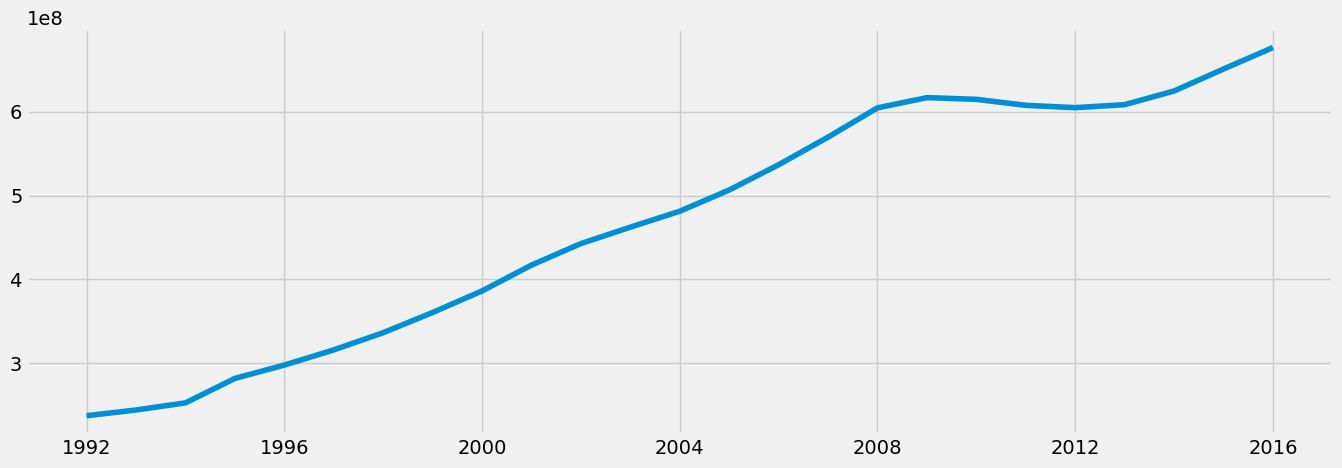

In [41]:
plt.figure(figsize = (15,5), dpi = 100)

plt.plot(df2)

### 4. Decompose the Data

In [42]:
# Decompose

decomposition = sm.tsa.seasonal_decompose(df2, model = 'additive')

In [43]:
# Define chart size

rcParams['figure.figsize'] = 18, 7

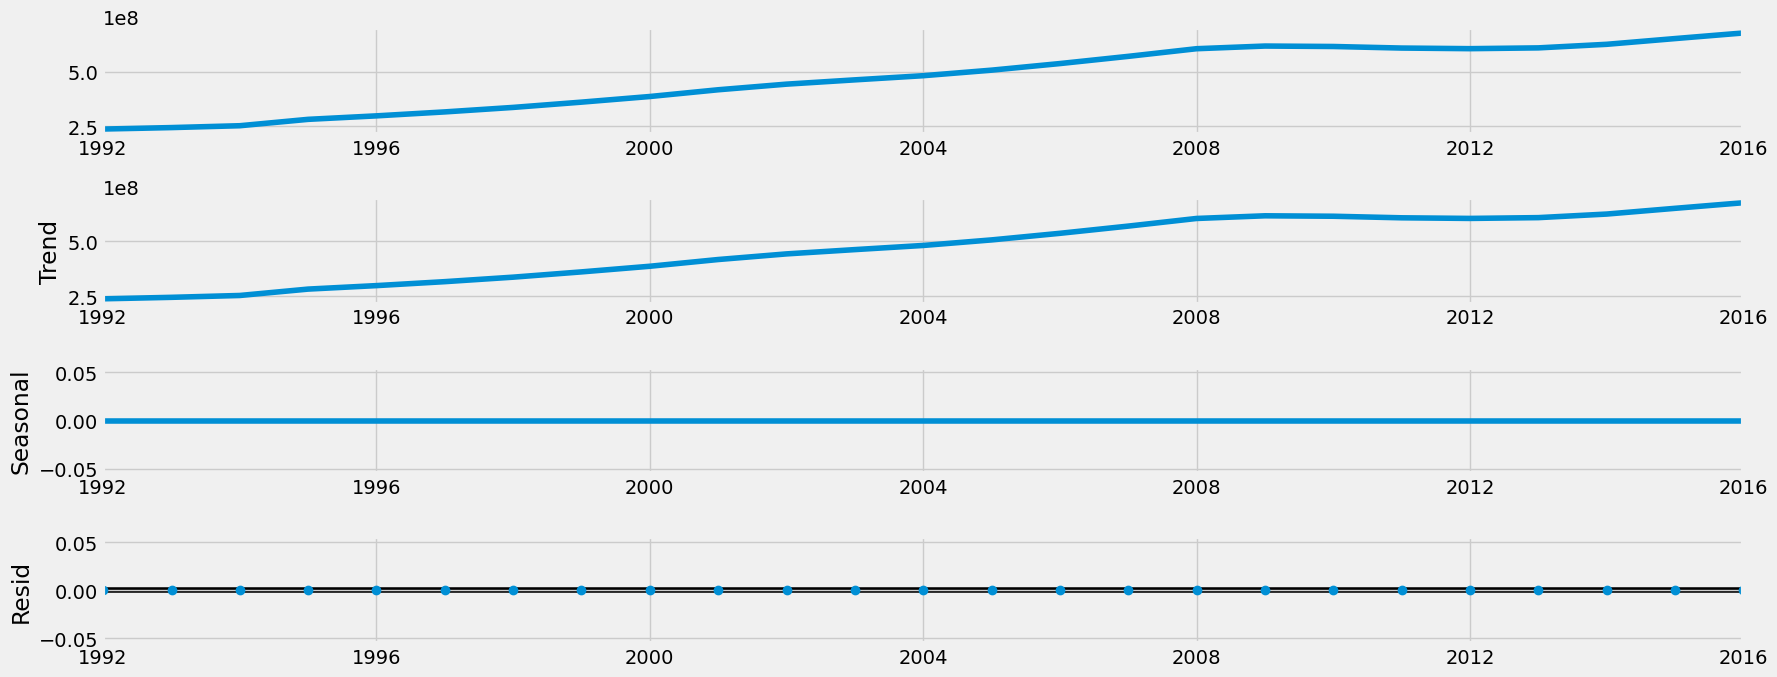

In [44]:
# Plot decomposition

decomposition.plot()
plt.show()

ANALYSIS OF RESULTS

There is an upward trend with no seasonality. Due to the upward trend, it does not have stationarity.

### 5. Conduct Dickey-Fuller Test for Stationarity

In [50]:
# Define dickey_fuller

def dickey_fuller (timeseries):
    print('Dicker-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' %key] = value
    print (result)

In [52]:
# Apply dickey_fuller

dickey_fuller(df2['total_expenditure'])

Dicker-Fuller Stationarity Test:
Test Statistic                 -1.381007
p-value                         0.591347
Number of Lags Used             2.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


INTERPRETATION

Null hypothesis: There is a unit root in the data

Test Statistic is greater than Critical Value at 5%, so we cannot reject the null hypothesis. The data is not stationary.

### 6. Differencing

In [53]:
# Perform differencing

df_diff = df2 - df2.shift(1)

df_diff.dropna(inplace = True)

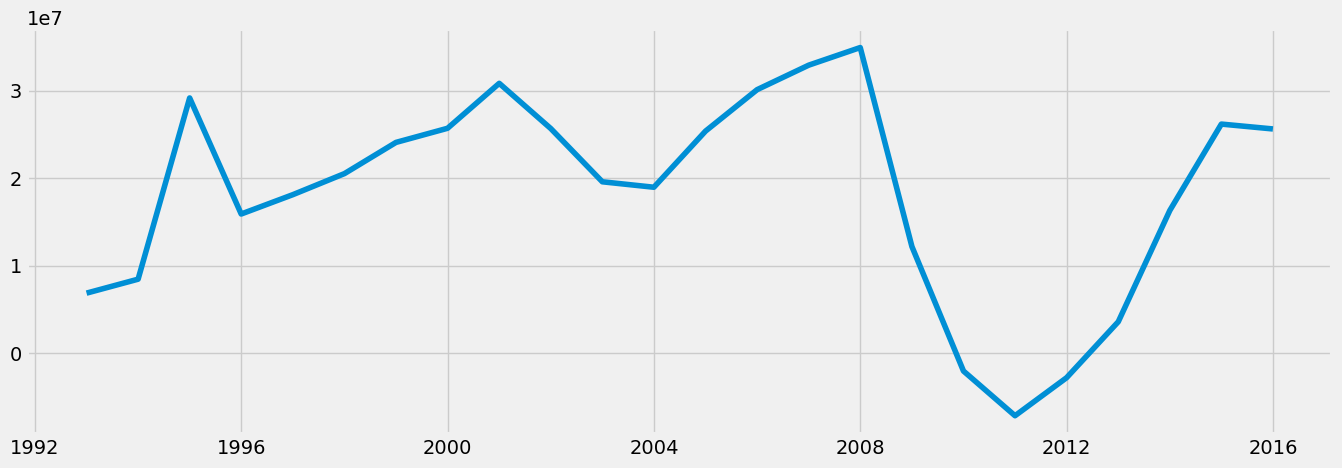

In [54]:
# Plot new data

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df_diff)

In [55]:
# Redo dickey_fuller

dickey_fuller(df_diff['total_expenditure'])

Dicker-Fuller Stationarity Test:
Test Statistic                 -4.994425
p-value                         0.000023
Number of Lags Used             9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


INTERPRETATION

Test Statistic is lower than Critical Value at 5% (and even 1%). We can reject the null hypothesis and accept the data to have stationarity.

### 7. Check Autocorrelations

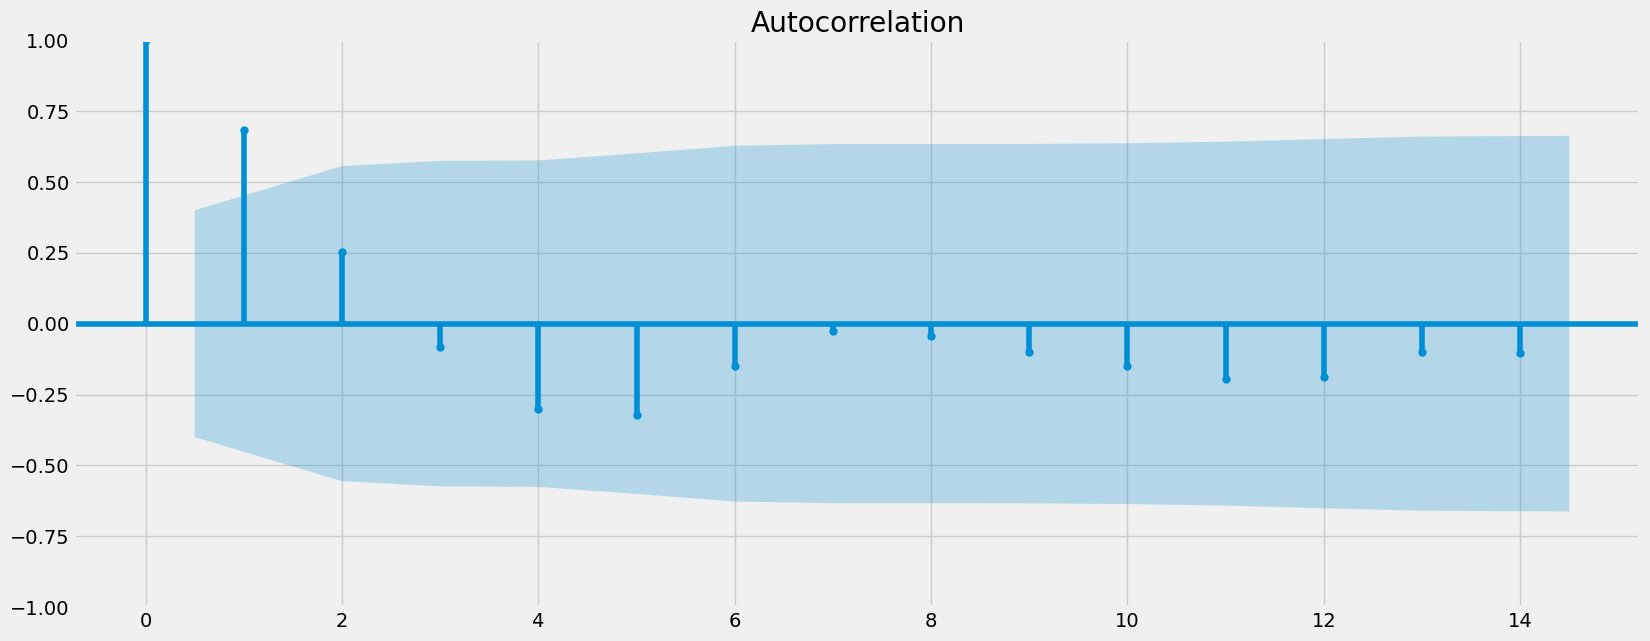

In [56]:
# Plot autocorrelations

plot_acf(df_diff)
plt.show()